In [1]:
import pandas as pd
import numpy as np

# Install need packages

In [4]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install pytorch-forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 3.2 MB/s eta 0:00:00


In [7]:
!pip install optuna-integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.0 MB/s eta 0:00:00


# Load the dataset

In [2]:
data = pd.read_csv("/content/Portugal 2022-08-01 to 2023-08-01.csv")

In [3]:
data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Portugal,2022-08-01,30.4,19.9,25.6,30.6,19.9,25.7,15.6,55.1,...,19.3,9,10,2022-08-01T06:37:52,2022-08-01T20:47:33,0.13,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08532099999,08534099999,D7126,0853..."
1,Portugal,2022-08-02,31.0,17.7,22.6,31.4,17.7,22.7,16.9,71.9,...,14.5,9,10,2022-08-02T06:38:44,2022-08-02T20:46:32,0.16,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
2,Portugal,2022-08-03,28.0,19.0,22.3,28.6,19.0,22.4,16.9,72.7,...,7.2,3,10,2022-08-03T06:39:37,2022-08-03T20:45:29,0.20,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
3,Portugal,2022-08-04,25.3,19.2,21.1,25.3,19.2,21.1,17.1,78.5,...,7.1,3,10,2022-08-04T06:40:30,2022-08-04T20:44:25,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
4,Portugal,2022-08-05,26.8,18.6,21.3,27.4,18.6,21.4,17.0,77.7,...,8.9,4,10,2022-08-05T06:41:23,2022-08-05T20:43:20,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Portugal,2023-07-28,28.0,17.7,22.2,28.2,17.7,22.2,16.6,72.9,...,28.8,10,10,2023-07-28T06:34:13,2023-07-28T20:51:37,0.36,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08532099999,08534099999,08536099999,LPPT"
362,Portugal,2023-07-29,29.0,20.0,23.3,30.4,20.0,23.6,18.4,75.4,...,27.7,9,10,2023-07-29T06:35:04,2023-07-29T20:50:42,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08534099999,08536099999,LPPT"
363,Portugal,2023-07-30,28.3,18.2,22.6,28.2,18.2,22.6,14.7,63.8,...,29.1,10,10,2023-07-30T06:35:56,2023-07-30T20:49:46,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08534099999,08536099999,LPPT"
364,Portugal,2023-07-31,27.2,18.0,21.9,27.3,18.0,21.9,15.4,68.4,...,29.2,10,10,2023-07-31T06:36:48,2023-07-31T20:48:48,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08532099999,08534099999,D7126,08536099999,LPPT"


# Import need libraries

In [5]:
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

In [8]:

from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss


In [9]:

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss


# Prepare dataset

In [10]:
data.isnull().sum()

,0
name,0
datetime,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0


In [11]:
max_encoder_length = 330
max_prediction_length = 30

In [12]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [13]:
data["time_idx"] = (data["datetime"] - data["datetime"].min()).dt.days

In [14]:
data["time_idx"]

,time_idx
0,0
1,1
2,2
3,3
4,4
...,...
361,361
362,362
363,363
364,364


In [15]:
training_cutoff = data["time_idx"].max() - max_prediction_length

In [16]:
data["group_id"] = 0

In [17]:

data["month"] = data["datetime"].dt.month
data["dayofweek"] = data["datetime"].dt.dayofweek


# Division of the dataset into training, validation, and test sets

In [18]:
training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="temp",
    group_ids=["group_id"],
    min_encoder_length=30,
    max_encoder_length=max_encoder_length,
    min_prediction_length=7,
    max_prediction_length=max_prediction_length,
    static_categoricals=["name"],
    static_reals=[],
    time_varying_known_categoricals=[],
    variable_groups={},
    time_varying_known_reals=["solarenergy","tempmax", "tempmin", "uvindex", "severerisk", "moonphase", "month", "dayofweek"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["temp"],
    target_normalizer=GroupNormalizer(
        groups=["group_id"], transformation="softplus"
    ),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
)

In [19]:
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

In [20]:
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [21]:
baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
MAE()(baseline_predictions.output, baseline_predictions.y)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


tensor(2.6800)

In [22]:
test_cutoff = data["time_idx"].max() - max_prediction_length

test_cutoff = test_cutoff - (training.min_encoder_length + training.min_prediction_length)

test = TimeSeriesDataSet.from_dataset(
    training,
    data[lambda x: x.time_idx > test_cutoff],
    predict=True,
    stop_randomization=True
)

In [23]:
test_dataloader = test.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

# Hyperparameter optimization

In [35]:
early_stop_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=True, mode="min")
lr_monitor = LearningRateMonitor(logging_interval='step')


In [ ]:
import optuna
from optuna.integration import PyTorchLightningPruningCallback

def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    hidden_size = trial.suggest_int('hidden_size', 8, 128)
    attention_head_size = trial.suggest_int('attention_head_size', 1, 4)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    hidden_continuous_size = trial.suggest_int('hidden_continuous_size', 8, 128)

    tft = TemporalFusionTransformer.from_dataset(
        training,
        learning_rate=learning_rate,
        hidden_size=hidden_size,
        attention_head_size=attention_head_size,
        dropout=dropout,
        hidden_continuous_size=hidden_continuous_size,
        loss=QuantileLoss(),
        optimizer="Adam"
    )

    trainer = pl.Trainer(
        max_epochs=10,
        accelerator="cpu",
        gradient_clip_val=0.1,
        log_every_n_steps=1,
        callbacks=[
            PyTorchLightningPruningCallback(trial, monitor="val_loss"),
            early_stop_callback,
            lr_monitor
        ],
        logger=TensorBoardLogger("lightning_logs")
    )

    trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)
    val_loss = trainer.callback_metrics["val_loss"].item()
    return val_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print(f"Najlepszy trial: {study.best_trial.value}")
print(f"Najlepsze parametry: {study.best_trial.params}")

[I 2025-03-27 20:15:06,689] A new study created in memory with name: no-name-f0e8966b-6b5b-4c1a-819d-00fad48a0135
<ipython-input-28-f4da40d5c67b>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO:pytorch_lightning.utilities.r

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved. New best score: 0.684
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved. New best score: 0.684


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.206 >= min_delta = 0.0. New best score: 0.478
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.206 >= min_delta = 0.0. New best score: 0.478


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.099 >= min_delta = 0.0. New best score: 0.379
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.099 >= min_delta = 0.0. New best score: 0.379


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.098 >= min_delta = 0.0. New best score: 0.281
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.098 >= min_delta = 0.0. New best score: 0.281


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.029 >= min_delta = 0.0. New best score: 0.252
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.029 >= min_delta = 0.0. New best score: 0.252


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.240
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.240


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.025 >= min_delta = 0.0. New best score: 0.215
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.025 >= min_delta = 0.0. New best score: 0.215


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.178
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.178
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2025-03-27 20:26:09,301] Trial 0 finished with value: 0.17796701192855835 and parameters: {'learning_rate': 0.0010050756021825961, 'hidden_size': 116, 'attention_head_size': 3, 'dropout': 0.49960234041899343, 'hidden_continuous_size': 119}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.177
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.177


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.172
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.172


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2025-03-27 20:32:45,210] Trial 1 finished with value: 0.17923472821712494 and parameters: {'learning_rate': 0.001160770617656997, 'hidden_size': 81, 'attention_head_size': 4, 'dropout': 0.10414971303343186, 'hidden_continuous_size': 78}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 10 records. Best score: 0.172. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 10 records. Best score: 0.172. Signaling Trainer to stop.
[I 2025-03-27 20:39:31,484] Trial 2 finished with value: 0.9844908118247986 and parameters: {'learning_rate': 1.3912459951513505e-05, 'hidden_size': 111, 'attention_head_size': 3, 'dropout': 0.1577538421171339, 'hidden_continuous_size': 102}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Na

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 11 records. Best score: 0.172. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 11 records. Best score: 0.172. Signaling Trainer to stop.
[I 2025-03-27 20:40:00,083] Trial 3 finished with value: 0.5927123427391052 and parameters: {'learning_rate': 0.005955315337924956, 'hidden_size': 57, 'attention_head_size': 1, 'dropout': 0.47744358974110146, 'hidden_continuous_size': 120}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 12 records. Best score: 0.172. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 12 records. Best score: 0.172. Signaling Trainer to stop.
[I 2025-03-27 20:40:36,968] Trial 4 finished with value: 0.5940349102020264 and parameters: {'learning_rate': 0.0006752140983036295, 'hidden_size': 83, 'attention_head_size': 2, 'dropout': 0.3267268926361472, 'hidden_continuous_size': 55}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:40:56,677] Trial 5 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | M

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 13 records. Best score: 0.172. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 13 records. Best score: 0.172. Signaling Trainer to stop.
[I 2025-03-27 20:41:28,707] Trial 6 finished with value: 0.4844265580177307 and parameters: {'learning_rate': 0.006025698308757188, 'hidden_size': 63, 'attention_head_size': 2, 'dropout': 0.45257085038826717, 'hidden_continuous_size': 108}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:42:13,911] Trial 7 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | M

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:42:24,220] Trial 8 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | M

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:42:47,319] Trial 9 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | M

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 14 records. Best score: 0.172. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 14 records. Best score: 0.172. Signaling Trainer to stop.
[I 2025-03-27 20:43:42,339] Trial 10 finished with value: 0.5262377262115479 and parameters: {'learning_rate': 0.0001928479890071114, 'hidden_size': 126, 'attention_head_size': 3, 'dropout': 0.3646745275275559, 'hidden_continuous_size': 8}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 15 records. Best score: 0.172. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 15 records. Best score: 0.172. Signaling Trainer to stop.
[I 2025-03-27 20:44:30,105] Trial 11 finished with value: 0.5197458267211914 and parameters: {'learning_rate': 0.0008598176963638144, 'hidden_size': 98, 'attention_head_size': 4, 'dropout': 0.10182072163768462, 'hidden_continuous_size': 88}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Nam

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:45:32,067] Trial 12 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 16 records. Best score: 0.172. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 16 records. Best score: 0.172. Signaling Trainer to stop.
[I 2025-03-27 20:46:21,003] Trial 13 finished with value: 0.5425986051559448 and parameters: {'learning_rate': 0.003890180310308406, 'hidden_size': 84, 'attention_head_size': 4, 'dropout': 0.25321002879242765, 'hidden_continuous_size': 123}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Nam

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:47:32,776] Trial 14 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:48:05,096] Trial 15 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 17 records. Best score: 0.172. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 17 records. Best score: 0.172. Signaling Trainer to stop.
[I 2025-03-27 20:48:21,298] Trial 16 finished with value: 0.4411930441856384 and parameters: {'learning_rate': 0.0021620878722000015, 'hidden_size': 32, 'attention_head_size': 3, 'dropout': 0.10668101914234465, 'hidden_continuous_size': 36}. Best is trial 0 with value: 0.17796701192855835.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Nam

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:49:22,825] Trial 17 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:50:29,721] Trial 18 pruned. Trial was pruned at epoch 0.
INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-03-27 20:51:18,688] Trial 19 pruned. Trial was pruned at epoch 0.


Najlepszy trial: 0.17796701192855835
Najlepsze parametry: {'learning_rate': 0.0010050756021825961, 'hidden_size': 116, 'attention_head_size': 3, 'dropout': 0.49960234041899343, 'hidden_continuous_size': 119}


# Training the model over multiple epochs

In [24]:

pl.seed_everything(42)
trainer = pl.Trainer(
    max_epochs=15,
    accelerator="cpu",
    gradient_clip_val=0.1,
     log_every_n_steps=1
)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [25]:
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.0010050756021825961,
    hidden_size=116,
    attention_head_size=3,
    dropout=0.49960234041899343,
    hidden_continuous_size=119,
    loss=QuantileLoss(),
    optimizer="Adam"
)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [26]:
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | ModuleDict                      | 3.1 K  | train
4  | static_variable_selection          | VariableSelectionNetwork        | 168 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 567 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 510 K  | train
7  | static_context_variable_selection  | GatedResidualNetwork            | 54.5 K | train
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 5

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


# Model Evaluation Metrics Comparison

In [32]:
from sklearn.metrics import mean_squared_error

In [27]:
predictions = tft.predict(val_dataloader)

In [65]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])

In [30]:
mae = MAE()(predictions, actuals)

In [31]:
mae

tensor(0.3113)

In [33]:
mse = mean_squared_error(predictions, actuals)
mse

0.16503439611042267

In [34]:
rmse = np.sqrt(mse)
rmse

np.float64(0.4062442567106921)

# Visualization of Forecast Results and Model Interpretation

In [36]:
raw_predictions = tft.predict(val_dataloader, mode="raw", return_x=True)

In [37]:
tft.hparams.max_encoder_length = 400

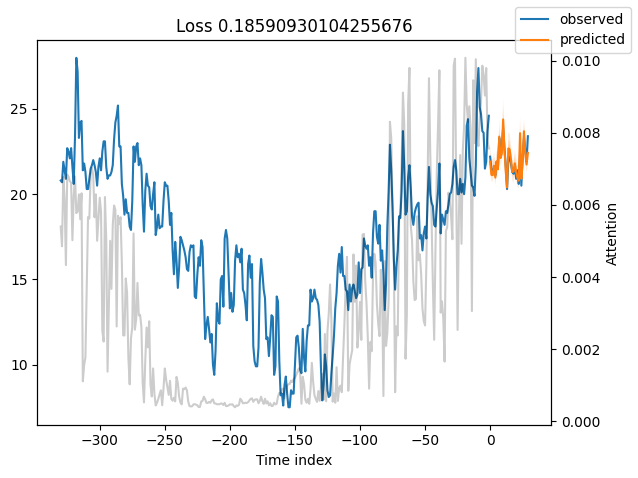

In [38]:
for idx in range(1):
    tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=idx, add_loss_to_title=True)

{'attention': <Figure size 640x480 with 1 Axes>,
 'static_variables': <Figure size 700x300 with 1 Axes>,
 'encoder_variables': <Figure size 700x450 with 1 Axes>,
 'decoder_variables': <Figure size 700x425 with 1 Axes>}

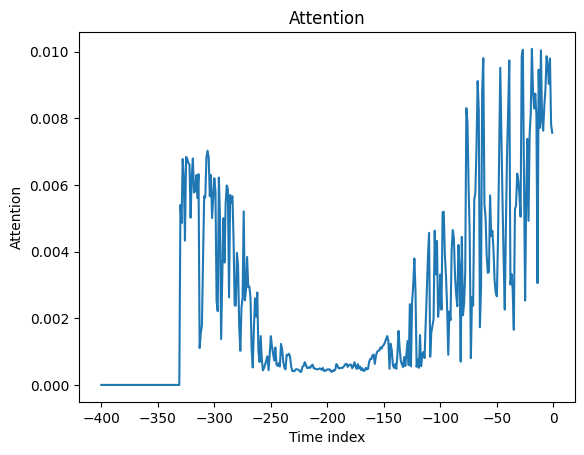

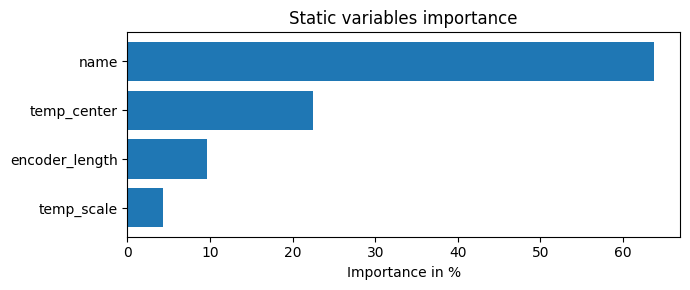

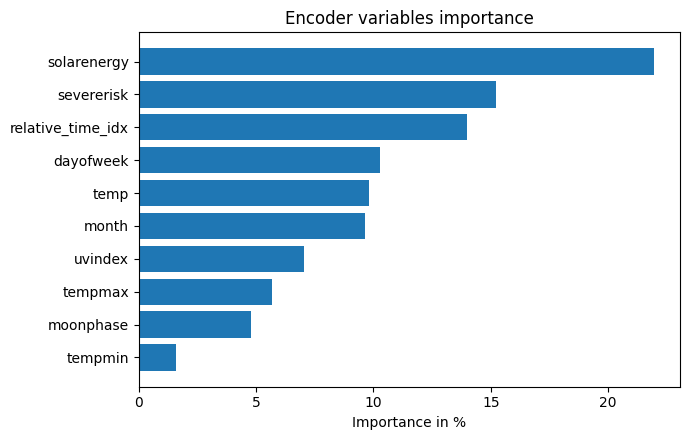

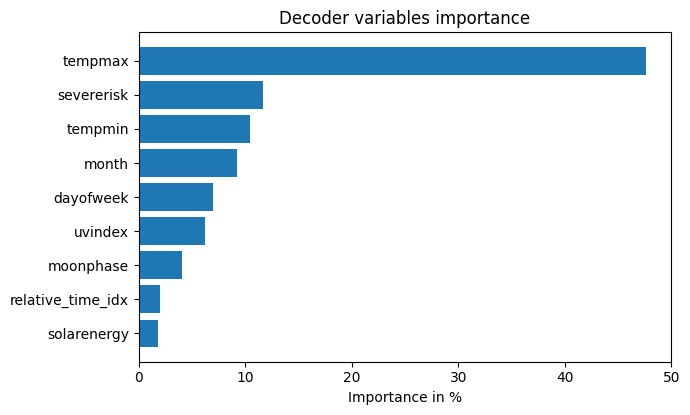

In [39]:
interpretation = tft.interpret_output(raw_predictions.output, reduction="sum")
tft.plot_interpretation(interpretation)

In [40]:
test_predictions = tft.predict(test_dataloader)

In [41]:

test_actuals = torch.cat([y[0] for x, y in iter(test_dataloader)])
test_mae = MAE()(test_predictions, test_actuals)
print(f"MAE dla zbioru testowego: {test_mae}")

test_mse = mean_squared_error(test_predictions, test_actuals)
test_rmse = np.sqrt(test_mse)
print(f"MSE dla zbioru testowego: {test_mse}")
print(f"RMSE dla zbioru testowego: {test_rmse}")


MAE dla zbioru testowego: 0.31189510226249695
MSE dla zbioru testowego: 0.1653066167641858
RMSE dla zbioru testowego: 0.40657916420321616


{'attention': <Figure size 640x480 with 1 Axes>,
 'static_variables': <Figure size 700x300 with 1 Axes>,
 'encoder_variables': <Figure size 700x450 with 1 Axes>,
 'decoder_variables': <Figure size 700x425 with 1 Axes>}

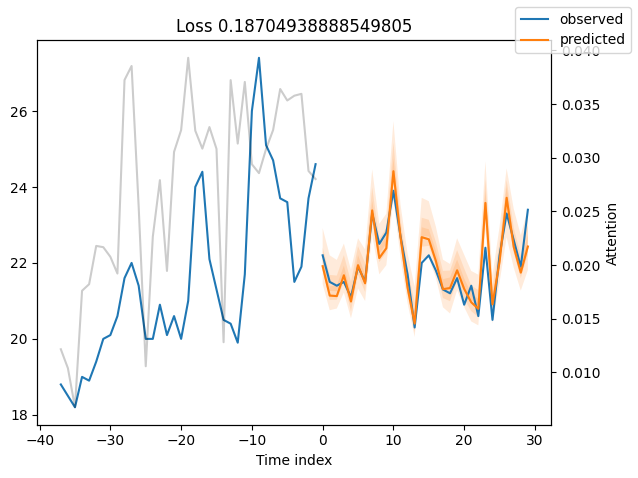

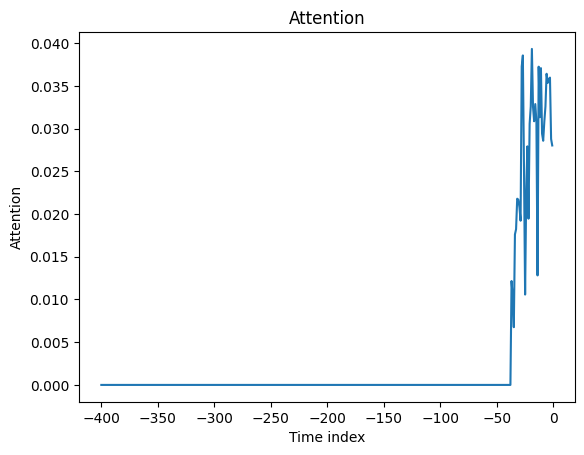

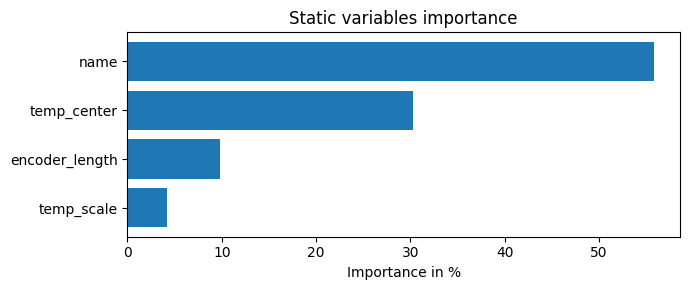

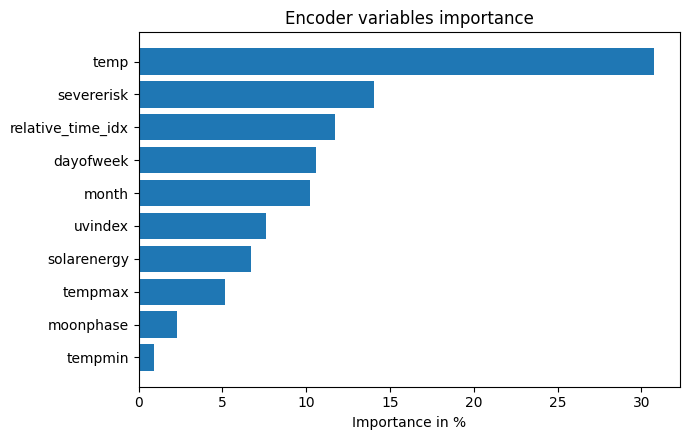

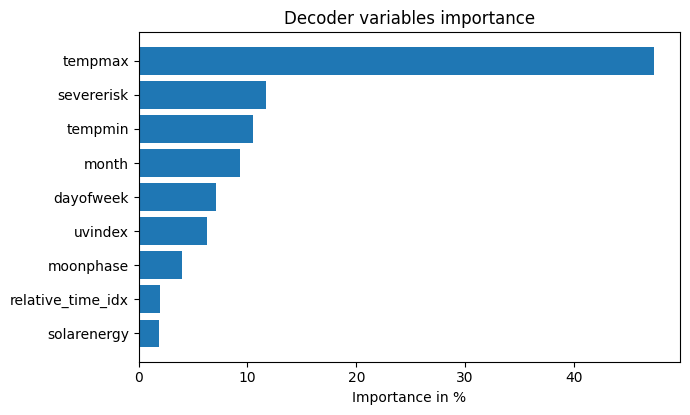

In [42]:
raw_test_predictions = tft.predict(test_dataloader, mode="raw", return_x=True)

for idx in range(1):
    tft.plot_prediction(raw_test_predictions.x, raw_test_predictions.output, idx=idx, add_loss_to_title=True)

test_interpretation = tft.interpret_output(raw_test_predictions.output, reduction="sum")
tft.plot_interpretation(test_interpretation)


# Model Saving and Loading

In [52]:
trainer.save_checkpoint("/content/drive/MyDrive/tft_checkpoint.ckpt")

In [59]:
from pytorch_forecasting import TemporalFusionTransformer

tft_loaded = TemporalFusionTransformer.load_from_checkpoint(
    "/content/drive/MyDrive/tft_checkpoint.ckpt"
)



/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [62]:
new_data = data[lambda x: x.time_idx > training_cutoff]
new_dataset = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)
new_dataloader = new_dataset.to_dataloader(train=False, batch_size=64, num_workers=0)

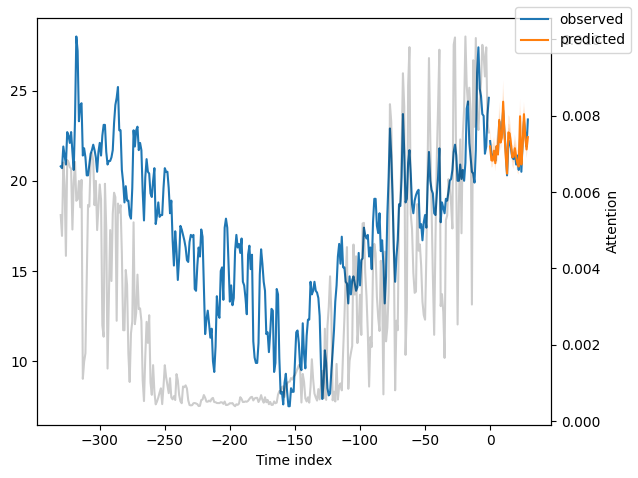

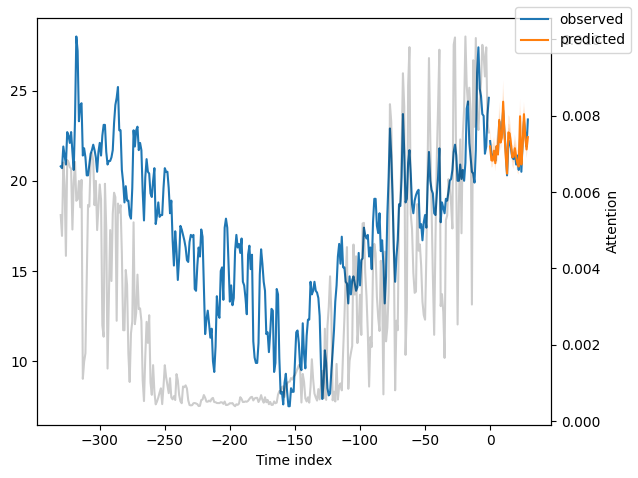

In [64]:
raw_predictions = tft_loaded.predict(new_dataloader, mode="raw", return_x=True)
tft_loaded.plot_prediction(raw_predictions.x, raw_predictions.output, idx=0)